In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import visualkeras

import tensorflow as tf
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
seed = 42
dataset_dir = 'training'

In [ ]:
!pip install split-folders
!pip install visualkeras
import visualkeras

  Using cached visualkeras-0.0.2-py3-none-any.whl (12 kB)
  Using cached aggdraw-1.3.12-cp37-cp37m-manylinux2010_x86_64.whl (795 kB)


In [ ]:
!unzip dataset.zip
import splitfolders as split_folders
split_folders.ratio('training', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [ ]:
dataset_dir = 'output'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [ ]:

# Images are divided into folders, one for each class. 
# If the images are organized in such a way, we can exploit the 
# ImageDataGenerator to read them from disk.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for training, validation, and test sets
aug_train_data_gen = ImageDataGenerator(rotation_range=40,
                                        height_shift_range=50,
                                        width_shift_range=50,
                                        zoom_range=0.4,
                                        horizontal_flip=True,
                                        vertical_flip=True, 
                                        fill_mode='reflect',
                                        rescale=1/255.)
valid_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug_train_gen = aug_train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=256,
                                               shuffle=True,
                                               seed=seed)
valid_gen = valid_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=256,
                                               shuffle=False,
                                               seed=seed)
test_gen = test_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=(256,256),
                                              color_mode='rgb',
                                              classes=None, # can be set to labels
                                              class_mode='categorical',
                                              batch_size=256,
                                              shuffle=False,
                                              seed=seed)

Found 14176 images belonging to 14 classes.
Found 1765 images belonging to 14 classes.
Found 1787 images belonging to 14 classes.


In [ ]:
input_shape = (256, 256, 3)
epochs = 200

In [ ]:
def build_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    #resize_layer = tfkl.Resizing(128, 128, interpolation="bicubic")(input_layer)

    conv1_1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(input_layer)
    conv1_2 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv1_1)
    pool1 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv1_2)

    conv2_1 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool1)
    conv2_2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv2_1)
    pool2 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv2_2)


    conv3_1 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool2)
    conv3_2 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv3_1)
    pool3 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv3_2)

    conv4_1 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool3)
    conv4_2 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv4_1)
    pool4 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv4_2)
    
    conv5_1 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool4)
    conv5_2 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv5_1)
    glob_pooling = tfkl.GlobalAveragePooling2D(name='GloablPooling')(conv5_2)
    glob_pooling = tfkl.Dropout(0.3, seed=seed, name='GloablPoolingDropout')(glob_pooling)


    flattening_layer = tfkl.Flatten(name='Flatten')(glob_pooling)
    flattening_layer = tfkl.Dropout(0.3, seed=seed)(flattening_layer)
    classifier_layer1 = tfkl.Dense(units=256, name='Classifier1', activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed), kernel_regularizer=tf.keras.regularizers.l2(1e-5))(flattening_layer)
    classifier_layer1 = tfkl.Dropout(0.3, seed=seed)(classifier_layer1)
    #classifier_layer2 = tfkl.Dense(units=128, name='Classifier2', activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed), kernel_regularizer=tf.keras.regularizers.l2(1e-5))(classifier_layer1)
    #classifier_layer2 = tfkl.Dropout(0.3, seed=seed)(classifier_layer2)
    output_layer = tfkl.Dense(units=14, activation='softmax', name='Output')(classifier_layer1)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')
    
    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 64, 64, 32)        0     

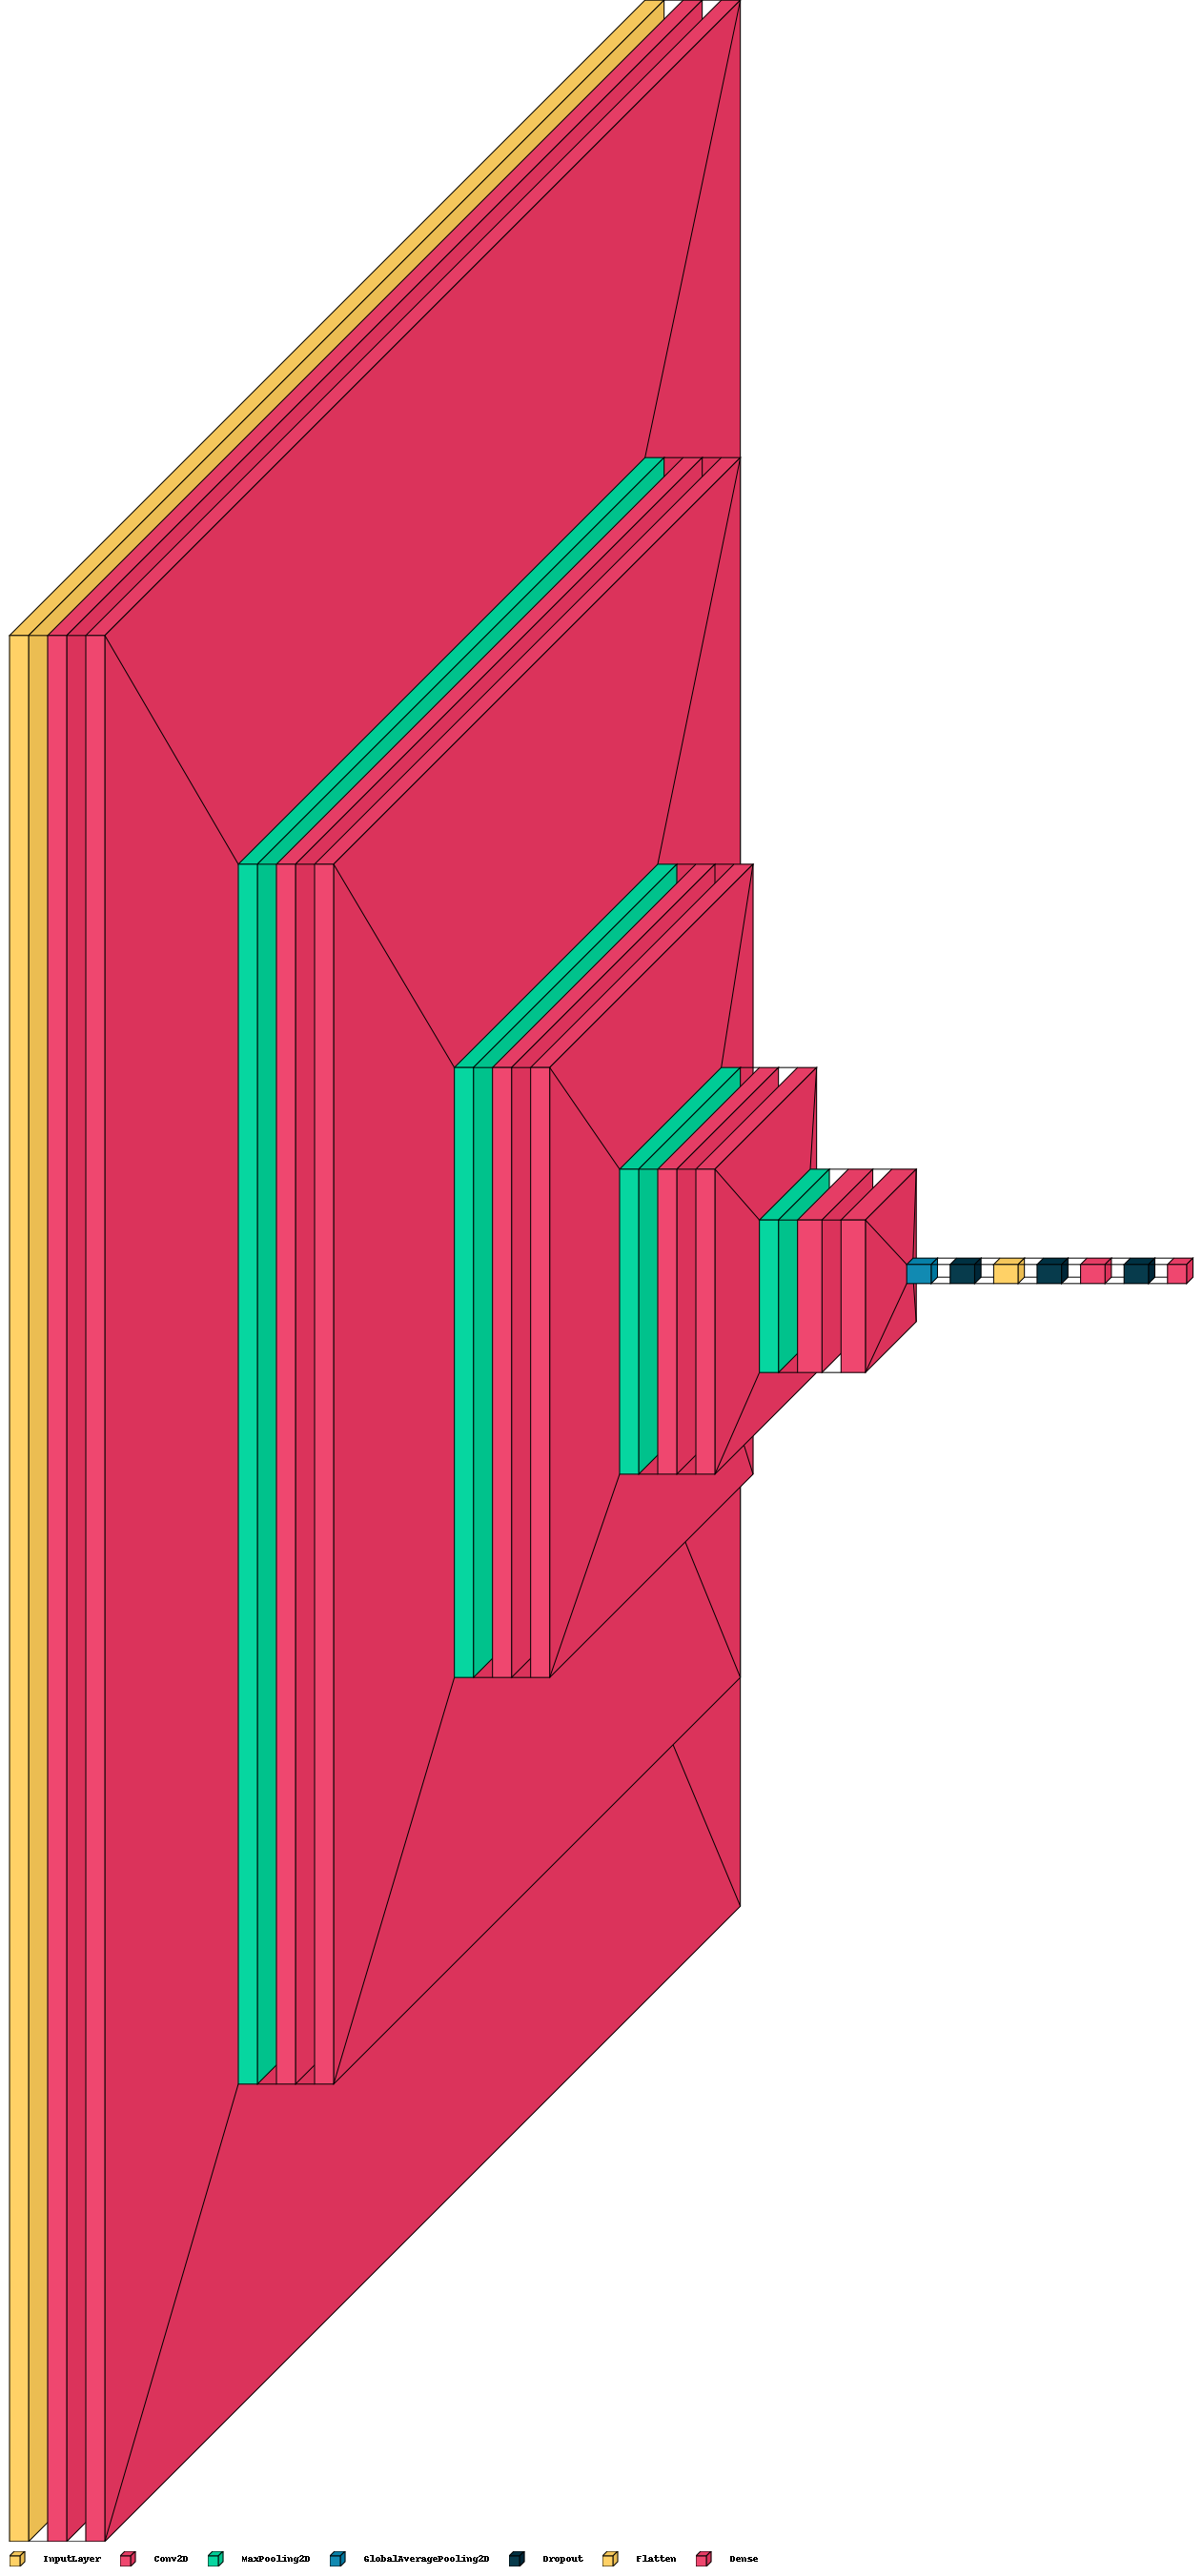

In [ ]:
model = build_model(input_shape)
model.summary()
visualkeras.layered_view(model, legend=True, spacing=20, scale_xy=10)

In [ ]:

# Train the model
history = model.fit(
    x = aug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)]
).history

Epoch 1/50
56/56 [==============================] - ETA: 0s - loss: 2.4124 - accuracy: 0.3023

2021-11-26 17:43:31.171366: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.62GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


56/56 [==============================] - 377s 7s/step - loss: 2.4124 - accuracy: 0.3023 - val_loss: 2.3136 - val_accuracy: 0.3224
Epoch 2/50
56/56 [==============================] - 361s 6s/step - loss: 2.2409 - accuracy: 0.3320 - val_loss: 2.0703 - val_accuracy: 0.3728
Epoch 3/50
56/56 [==============================] - 441s 8s/step - loss: 2.0125 - accuracy: 0.3854 - val_loss: 1.9661 - val_accuracy: 0.4380
Epoch 4/50
56/56 [==============================] - 389s 7s/step - loss: 1.8907 - accuracy: 0.4125 - val_loss: 1.8839 - val_accuracy: 0.4589
Epoch 5/50
56/56 [==============================] - 401s 7s/step - loss: 1.8069 - accuracy: 0.4268 - val_loss: 1.7518 - val_accuracy: 0.4567
Epoch 6/50
56/56 [==============================] - 394s 7s/step - loss: 1.7666 - accuracy: 0.4400 - val_loss: 1.7661 - val_accuracy: 0.4504
Epoch 7/50
56/56 [==============================] - 407s 7s/step - loss: 1.7010 - accuracy: 0.4714 - val_loss: 1.8657 - val_accuracy: 0.4584
Epoch 8/50
56/56 [======

In [ ]:
# Plot the training
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

In [ ]:
model.save('SavedCNN')

INFO:tensorflow:Assets written to: SavedCNN3/assets


INFO:tensorflow:Assets written to: SavedCNN3/assets
